In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

In [2]:
IMG_SHAPE = 128
BATCH_SIZE = 64
EPOCHS = 50

In [5]:
def load_dataset():
    X = []
    y = []
    for path in glob.glob('data/NT/normaltrucks/*.jpg'):
        img = tf.keras.preprocessing.image.load_img(path)
        img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
        X.append(img)
        y.append([0])
    for path in glob.glob('data/OT/overtrucks/*.jpg'):
        img = tf.keras.preprocessing.image.load_img(path)
        img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
        X.append(img)
        y.append([1])
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [6]:
X, y = load_dataset()
X.shape, y.shape

((147, 128, 128, 3), (147, 1))

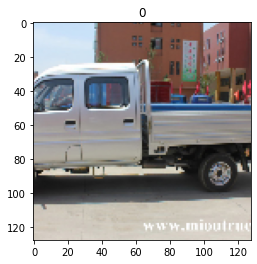

In [8]:
plt.imshow(X[5])
plt.title(y[5][0])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train.shape, y_train.shape

((102, 128, 128, 3), (102, 1))

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

17235968/17225924 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1048640   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,277,569
Trainable params: 4,255,681
Non-trainable params: 21,888
_________________________________________________________________


In [12]:
hist = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 validation_split=0.2, validation_batch_size=8, shuffle=True)


Epoch 1/50
2/2 [==============================] - 10s 1s/step - loss: 0.8088 - accuracy: 0.6173 - val_loss: 2.0429 - val_accuracy: 0.5238
Epoch 2/50
2/2 [==============================] - 4s 918ms/step - loss: 0.0751 - accuracy: 0.9630 - val_loss: 2.3293 - val_accuracy: 0.5238
Epoch 3/50
2/2 [==============================] - 4s 1s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 2.1308 - val_accuracy: 0.5238
Epoch 4/50
2/2 [==============================] - 4s 977ms/step - loss: 6.0841e-04 - accuracy: 1.0000 - val_loss: 1.8667 - val_accuracy: 0.5714
Epoch 5/50
2/2 [==============================] - 4s 901ms/step - loss: 3.4081e-04 - accuracy: 1.0000 - val_loss: 1.6273 - val_accuracy: 0.5714
Epoch 6/50
2/2 [==============================] - 3s 929ms/step - loss: 3.2274e-05 - accuracy: 1.0000 - val_loss: 1.3862 - val_accuracy: 0.6190
Epoch 7/50
2/2 [==============================] - 4s 871ms/step - loss: 1.0408e-05 - accuracy: 1.0000 - val_loss: 1.2017 - val_accuracy: 0.7143
Epoch 8/5

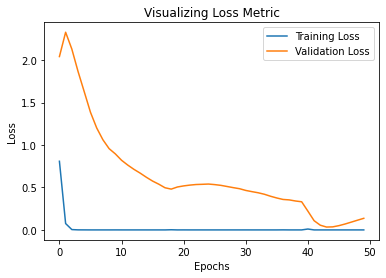

In [13]:
plt.plot(range(0, EPOCHS) ,hist.history['loss'], label='Training Loss')
plt.plot(range(0, EPOCHS) ,hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Visualizing Loss Metric')
plt.legend()
plt.show()

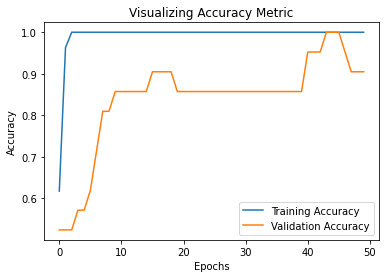

In [14]:
plt.plot(range(0, EPOCHS) ,hist.history['accuracy'], label='Training Accuracy')
plt.plot(range(0, EPOCHS) ,hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing Accuracy Metric')
plt.legend()
plt.show()

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 107ms/step - loss: 0.0710 - accuracy: 0.9778


[0.07102163136005402, 0.9777777791023254]

In [16]:
def predict(path):
    img = tf.keras.preprocessing.image.load_img(path)
    img = tf.keras.preprocessing.image.smart_resize(tf.keras.preprocessing.image.img_to_array(img)/255.0,(IMG_SHAPE,IMG_SHAPE))
    pred = model.predict(np.array([img]))[0]
    plt.imshow(img)
    if (pred >= 0.6):
        plt.title('Overloaded Truck')
    elif (pred > 0.4) and (pred < 0.6):
        plt.title("Not Sure")
    else:
        plt.title("Truck Not Overoaded")
    plt.show()

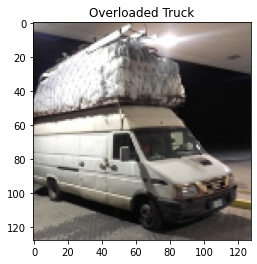

In [22]:
predict('data\OT _NT\OT & NT/11-OT.jpg')